#### IMPORTANDO BIBLIOTECAS

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from math import sqrt
transformar_features = True

2024-08-04 14:22:20.488230: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### CONFIGURAÇÕES GPU

In [2]:
# DESCOMENTAR PARA FORÇAR A RODAR EM CPU
# import os

# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

GPU found


2024-08-04 14:22:21.845550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-04 14:22:21.852144: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-04 14:22:21.856729: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-04 14:22:21.856834: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there m

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-08-04 14:22:22.251622: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-04 14:22:22.251792: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-04 14:22:22.251881: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [4]:
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

#### CARREGANDO DADOS VAREJO

In [5]:
# # df_dados = pd.read_csv('../dados/sinteticos/sales_sint_mensal.csv')
# df_dados = pd.read_csv('../dados/sales25.csv')

# df_dados['date'] =  pd.to_datetime(df_dados['date'],format='%Y-%m-%d',errors='coerce')

# #COMENTAR PARA DADOS SINTÉTICOS
# df_dados = df_dados[df_dados['item_nbr'] == 1439]

# df_dados = df_dados[df_dados['date'] >= '2017-08-01']
# df_dados = df_dados[df_dados['date'] <= '2020-08-30']
# #COMENTAR PARA DADOS SINTÉTICOS

# df_dados['d_semana'] = df_dados['date'].dt.strftime("%u")
# df_dados['d_mes'] = df_dados['date'].dt.strftime("%d")
# df_dados['d_ano'] = df_dados['date'].dt.strftime("%j")

# df_dados['d_semana'] = df_dados['d_semana'].astype(int)
# df_dados['d_mes'] = df_dados['d_mes'].astype(int)
# df_dados['d_ano'] = df_dados['d_ano'].astype(int)

# feature_names = ['unit_sales','price','d_semana','d_mes','d_ano']
# df_dados_model = df_dados.filter(feature_names)

# coluna_serie = 'unit_sales'

# df_dados_model

#### CARREGANDO DADOS MOBILIDADE

In [6]:
df_dados = pd.read_csv('../dados/dados_onibus.csv')

df_dados['data_hora'] =  pd.to_datetime(df_dados['data_hora'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

df_dados = df_dados[df_dados['linha'] == 52]

df_dados['d_semana'] = df_dados['data_hora'].dt.strftime("%u")
df_dados['d_mes'] = df_dados['data_hora'].dt.strftime("%d")
df_dados['d_ano'] = df_dados['data_hora'].dt.strftime("%j")

df_dados['d_semana'] = df_dados['d_semana'].astype(int)
df_dados['d_mes'] = df_dados['d_mes'].astype(int)
df_dados['d_ano'] = df_dados['d_ano'].astype(int)

df_dados = df_dados[0:3500]

feature_names = ['validations_per_hour','hora','d_semana','d_mes','d_ano']
df_dados_model = df_dados.filter(feature_names)

coluna_serie = 'validations_per_hour'

df_dados

,linha,data_hora,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes,domingo,segunda,terca,quarta,quinta,sexta,sabado,feriado,vespera_feriado
154132,52,2018-01-01 03:00:00,42,1,7.308360e-01,0.682553,3,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
154133,52,2018-01-01 04:00:00,83,1,8.878852e-01,0.460065,4,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
154134,52,2018-01-01 05:00:00,424,1,9.790841e-01,0.203456,5,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
154135,52,2018-01-01 06:00:00,771,1,9.976688e-01,-0.068242,6,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
154136,52,2018-01-01 07:00:00,938,1,9.422609e-01,-0.334880,7,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157627,52,2018-06-15 23:00:00,243,5,-2.449294e-16,1.000000,23,15,166,6,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
157628,52,2018-06-16 00:00:00,134,6,0.000000e+00,1.000000,0,16,167,6,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
157629,52,2018-06-16 04:00:00,107,6,8.878852e-01,0.460065,4,16,167,6,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
157630,52,2018-06-16 05:00:00,383,6,9.790841e-01,0.203456,5,16,167,6,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0


#### APLICANDO SCALER

In [7]:
if(transformar_features): 
    scaler = MinMaxScaler(feature_range=(0, 1))

    df_dados_model[feature_names] = scaler.fit_transform(df_dados_model[feature_names])

    df_dados_model

In [8]:
df_dados_model

,validations_per_hour,hora,d_semana,d_mes,d_ano
154132,0.033773,0.130435,0.000000,0.000000,0.000000
154133,0.067545,0.173913,0.000000,0.000000,0.000000
154134,0.348435,0.217391,0.000000,0.000000,0.000000
154135,0.634267,0.260870,0.000000,0.000000,0.000000
154136,0.771829,0.304348,0.000000,0.000000,0.000000
...,...,...,...,...,...
157627,0.199341,1.000000,0.666667,0.466667,0.993976
157628,0.109555,0.000000,0.833333,0.500000,1.000000
157629,0.087315,0.173913,0.833333,0.500000,1.000000
157630,0.314662,0.217391,0.833333,0.500000,1.000000


#### VISUALIZANDO DADOS

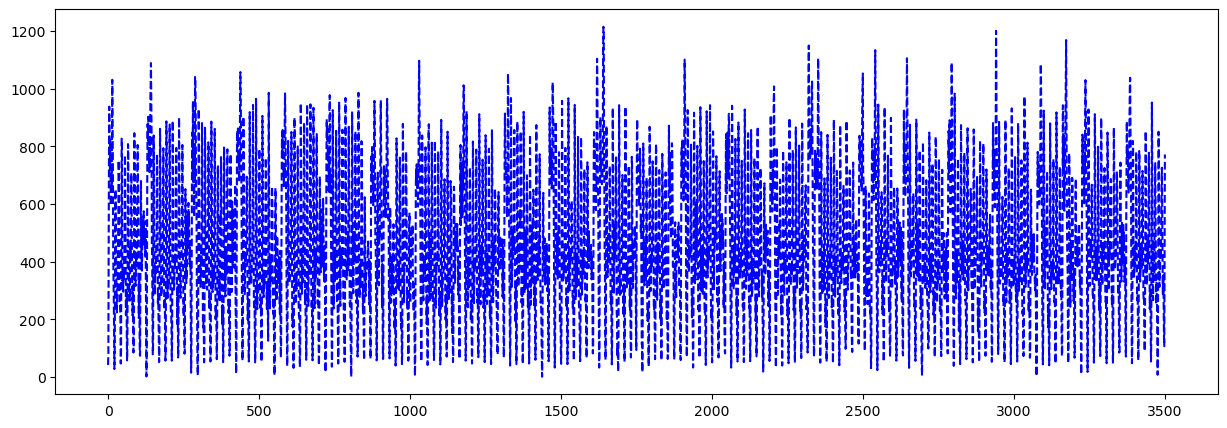

In [9]:
plt.figure(figsize=(15,5))
plt.plot(range(len(df_dados)),df_dados[coluna_serie], 'b--')
#plt.xlim(300,600)
plt.show()

#### MODELANDO COMO UM PROBLEMA DE PREVISÃO DE SÉRIE TEMPORAL

In [10]:
time_steps = 24
test_size = 168

train_size = int(len(df_dados_model)-(test_size))
train, test = df_dados_model.iloc[0:train_size], df_dados_model.iloc[(train_size-time_steps):len(df_dados_model)]

print(len(train), len(test))

3332 192


In [11]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps),0].to_numpy()
        v = np.append(v,X.iloc[i + time_steps,1])#price (varejo) #hora (mobilidade)
        v = np.append(v,X.iloc[i + time_steps,2])#d_semana
        v = np.append(v,X.iloc[i + time_steps,3])#d_mes
        v = np.append(v,X.iloc[i + time_steps,4])#d_ano
        Xs.append([v])
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_dataset(train, train[coluna_serie], time_steps)
X_test, y_test = create_dataset(test, test[coluna_serie], time_steps)

In [12]:
# X_train[len(X_train)-1]
# y_train[len(y_train)-1]
len(X_train)

3308

In [13]:
# X_test[0]
# y_test[0]

In [14]:
print(len(y_train),len(y_test))

3308 168


#### CONFIGURANDO E TREINANDO O MODELO

In [15]:
def getModel(model_type='LSTM'):
    if model_type == 'MLP':
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(100, activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])),
            tf.keras.layers.Dense(30, activation="relu"),
            tf.keras.layers.Dense(10, activation="relu"),
            tf.keras.layers.Dense(units=1, activation='softplus')
        ])
    elif model_type == 'LSTM':
        # MELHORES RESULTADOS COM BATCH SIZE 1. LEMBRAR DE MUDAR LÁ EMBAIXO
        model = tf.keras.Sequential([
            tf.keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
            tf.keras.layers.Dense(units=1, activation='softplus')
        ])
    elif model_type == 'BLSTM':
        # MELHORES RESULTADOS COM BATCH SIZE 1. LEMBRAR DE MUDAR LÁ EMBAIXO
        model = tf.keras.Sequential([
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
            tf.keras.layers.Dense(units=1, activation='softplus')
        ])
    elif model_type == 'Transformer':
        inputs = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
        attention_output = tf.keras.layers.MultiHeadAttention(num_heads=4, key_dim=X_train.shape[2])(inputs, inputs)
        attention_output = tf.keras.layers.GlobalAveragePooling1D()(attention_output)
        dense_output = tf.keras.layers.Dense(100, activation="relu")(attention_output)
        dense_output = tf.keras.layers.Dense(1)(dense_output)
        outputs = tf.keras.layers.Activation('softplus')(dense_output)
        model = tf.keras.Model(inputs=inputs, outputs=outputs)
    else:
        raise ValueError("Unknown model type")
    return model

In [16]:
model_type = 'Transformer'  # Mude para 'MLP', 'LSTM', 'BLSTM', 'Transformer' conforme necessário
model = getModel(model_type=model_type)

model.compile(
  loss='mean_squared_error',
  optimizer=tf.keras.optimizers.Adam(0.001)
)

2024-08-04 14:22:24.265676: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-04 14:22:24.265830: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-04 14:22:24.265917: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-04 14:22:24.266033: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-08-04 14:22:24.266120: I tensorflow/compiler/xla/stream_executo

In [17]:
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')]

callbacks.append(tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, verbose=0, restore_best_weights=True))

history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=1,
    validation_split=0.05,
    callbacks=callbacks,
    shuffle=False
)

Epoch 1/1000


2024-08-04 14:22:25.535650: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-08-04 14:22:25.540174: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x5cb372f41db0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-04 14:22:25.540188: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-08-04 14:22:25.544350: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-04 14:22:25.595926: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-08-04 14:22:25.608481: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most on

3142/3142 [==============================] - 6s 1ms/step - loss: 0.0139 - val_loss: 0.0207 - lr: 0.0010
Epoch 2/1000
3142/3142 [==============================] - 5s 1ms/step - loss: 0.0095 - val_loss: 0.0129 - lr: 0.0010
Epoch 3/1000
3142/3142 [==============================] - 5s 2ms/step - loss: 0.0072 - val_loss: 0.0100 - lr: 0.0010
Epoch 4/1000
3142/3142 [==============================] - 5s 1ms/step - loss: 0.0065 - val_loss: 0.0112 - lr: 0.0010
Epoch 5/1000
3142/3142 [==============================] - 5s 1ms/step - loss: 0.0064 - val_loss: 0.0067 - lr: 0.0010
Epoch 6/1000
3142/3142 [==============================] - 5s 2ms/step - loss: 0.0065 - val_loss: 0.0066 - lr: 0.0010
Epoch 7/1000
3142/3142 [==============================] - 5s 1ms/step - loss: 0.0066 - val_loss: 0.0063 - lr: 0.0010
Epoch 8/1000
3142/3142 [==============================] - 5s 1ms/step - loss: 0.0061 - val_loss: 0.0067 - lr: 0.0010
Epoch 9/1000
3142/3142 [==============================] - 5s 1ms/step - loss:

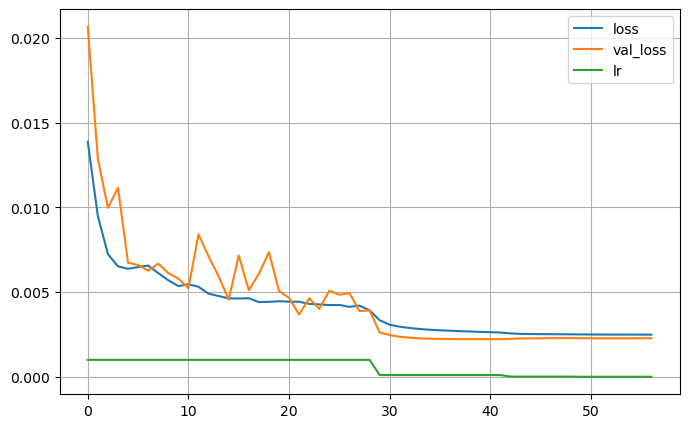

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

#### AVALIANDO O MODELO

In [19]:
# PREVENDO test_size DIAS

preds = []

base_teste = np.copy(X_test)

for i in range(len(base_teste)):
    
    y_pred = model.predict(np.array([base_teste[i]]))[0][0]

    preds.append(y_pred)

    for k in range(len(preds)):
        
        if k < time_steps:
            if(i<len(base_teste)-1):
                base_teste[i+1][0][(time_steps-1)-k] = preds[(len(preds)-1)-k]

# preds

1/1 [==============================] - 0s 11ms/step


In [20]:
# APLICANDO O INVERSE SCALING NOS DADOS

dados_pred = {
    coluna_serie: preds,
    feature_names[1]: [0] * test_size,
    feature_names[2]: [0] * test_size,
    feature_names[3]: [0] * test_size,
    feature_names[4]: [0] * test_size
}

df_dados_pred = pd.DataFrame(data=dados_pred)
df_dados_model = pd.concat([df_dados_model, df_dados_pred], ignore_index=True)

if transformar_features:
    df_dados_model[feature_names] = scaler.inverse_transform(df_dados_model[feature_names])

df_dados_real_predito = df_dados_model.tail(test_size * 2)

dados_real = df_dados_real_predito.iloc[:test_size][coluna_serie].to_numpy()
dados_predito = df_dados_real_predito.iloc[test_size:][coluna_serie].to_numpy()

dados_predito

array([471.78190142, 367.84983909, 344.64404702, 413.7626093 ,
       422.73605007, 405.55054086, 449.73513627, 477.88626665,
       578.81068397, 646.09980357, 509.79179764, 381.67617822,
       278.11470783, 283.0333091 , 308.55968761, 180.89165121,
        69.50368285,  85.37317099, 434.1488201 , 752.81183004,
       746.97924912, 549.16332889, 480.44072074, 440.48578668,
       473.08163244, 513.47177595, 485.51138663, 497.85239124,
       520.48176324, 592.46071786, 649.59797728, 533.08015251,
       425.57621777, 316.81159025, 312.96684813, 328.64712381,
       204.57612303,  60.59061749,  68.01147413, 420.90910381,
       722.65064633, 762.2501117 , 632.7593621 , 617.12706113,
       573.23975694, 596.78600299, 618.19277978, 604.06314355,
       588.78117371, 618.02750945, 717.23775363, 824.03075099,
       757.16298389, 591.90861076, 493.53900933, 406.67241091,
       336.44760835, 202.60525265,  74.06004525, 124.3914948 ,
       483.56048763, 833.14992487, 797.87086034, 573.27

In [21]:
df_real_predito = pd.DataFrame({'real':dados_real,'predito':dados_predito})

df_real_predito

,real,predito
0,458.0,471.781901
1,385.0,367.849839
2,373.0,344.644047
3,396.0,413.762609
4,401.0,422.736050
...,...,...
163,243.0,159.798881
164,134.0,45.312388
165,107.0,289.170291
166,383.0,622.352541


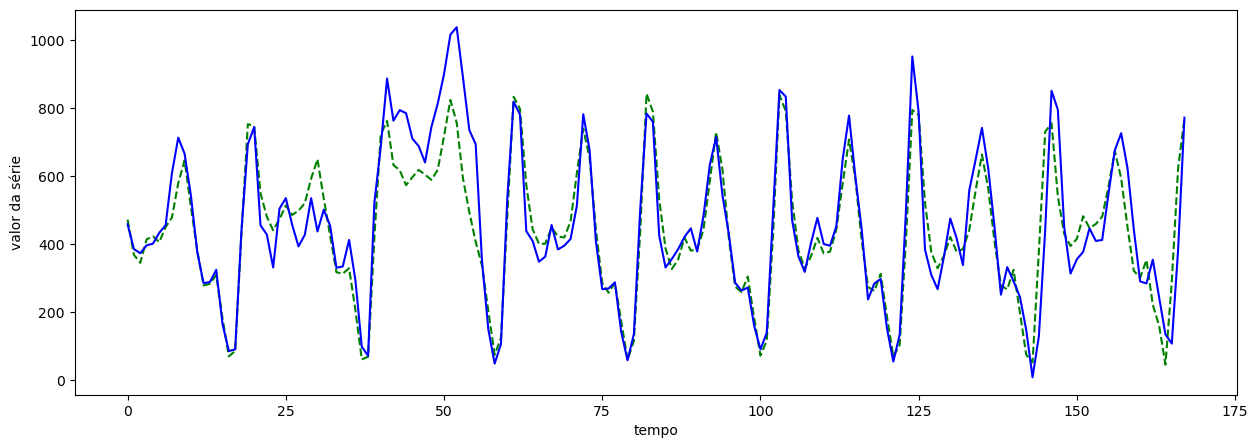

In [22]:
plt.figure(figsize=(15,5))
# plt.plot(range(len(y_train)),y_train, 'g--')
plt.plot(range(len(df_real_predito['predito'])),df_real_predito['predito'], 'g--')
plt.plot(range(len(df_real_predito['real'])),df_real_predito['real'], 'b')
# plt.xlim(0,200)
# plt.ylim(40,200)
plt.xlabel('tempo')
plt.ylabel('valor da série')
plt.show()

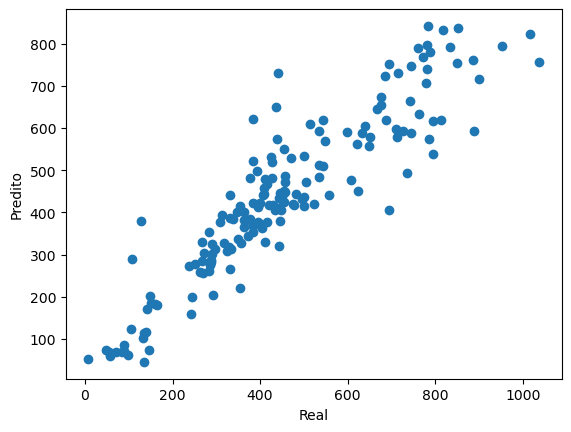

rmse= 91.76856756803807
mae= 16.431813324761883
smape= 63.74415945798336
r2= 0.8291199741030325


In [23]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

plt.scatter(df_real_predito['real'],df_real_predito['predito'])

plt.xlabel('Real')
plt.ylabel('Predito')

plt.show()
print('rmse=',sqrt(mean_squared_error(df_real_predito['real'].array,df_real_predito['predito'].array)))
print('mae=',smape(df_real_predito['real'].array,df_real_predito['predito'].array))
print('smape=',mean_absolute_error(df_real_predito['real'].array,df_real_predito['predito'].array))
print('r2=',r2_score(df_real_predito['real'].array,df_real_predito['predito'].array))